In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [41]:
def show_plot(x, y=None, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    if np.all(y) == None:
        plt.plot(x)
    else:
        plt.plot(x, y)
    plt.grid()
    plt.show()

Выполнить кратковременный узкополосный и широкополосный анализ вокализованного участка речи

In [42]:
fs1, x1 = wavfile.read('audio/TA0.wav')

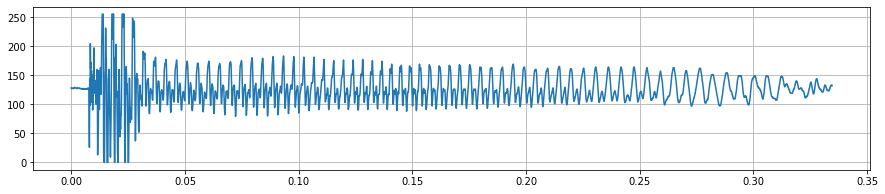

In [43]:
t1 = np.arange(0, len(x1)/fs1, 1/fs1)

show_plot(t1, x1, figsize=(15, 3))

In [44]:
x1 = x1[659:]
t1 = t1[659:]

---

In [45]:
N = 1024

In [46]:
1024/fs1

0.046439909297052155

In [47]:
spec_dw1_1024 = abs(np.fft.fft(x1, N))
t1 = t1[:N]

In [48]:
fff1 = np.arange(0, fs1, fs1/len(t1))

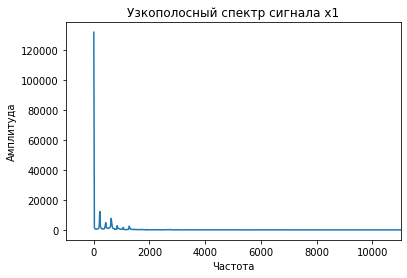

In [49]:
plt.plot(fff1[:N], spec_dw1_1024)
plt.title('Узкополосный спектр сигнала x1')
plt.xlim(-1000, fs1/2)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [50]:
N = 64

In [51]:
spec_dw1_64 = abs(np.fft.fft(x1, 64))
t1 = t1[:N]

In [52]:
fff1 = np.arange(0, fs1, fs1/len(t1))

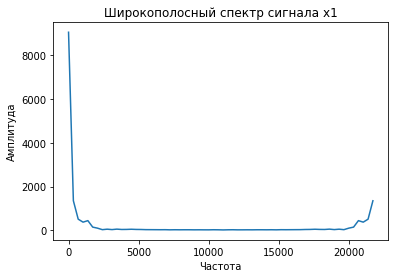

In [53]:
plt.plot(fff1[:N], spec_dw1_64)
plt.title('Широкополосный спектр сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [54]:
R = 5
N = len(spec_dw1_1024)
P1 = spec_dw1_1024 

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_dw1_1024[index]
    P1 = P1[:len(dec)] * dec

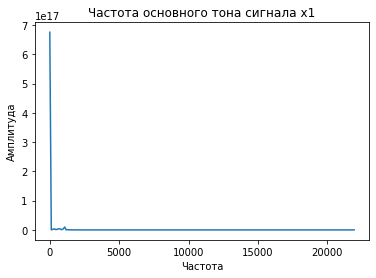

In [55]:
fff1 = np.arange(0, fs1, fs1/len(P1))
plt.plot(fff1, P1)
# plt.xlim(-1000, 3000)
plt.title('Частота основного тона сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

Выполнить гомоморфный спектральный анализ этого же участка речи.

---

In [56]:
fs1, x1 = wavfile.read('audio/TA0.wav')

x1 = x1[3310:(3310+1024)]

N = len(x1)
w = scipy.signal.hamming(N)

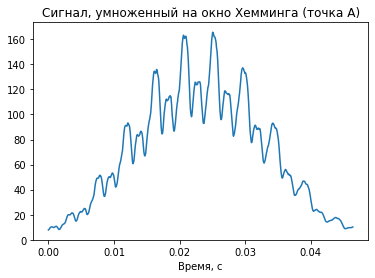

In [57]:
dw1 = x1 * w
t1 = np.arange(0, N/fs1, 1/fs1)
t1 = t1[:N]

plt.plot(t1, dw1)
plt.title('Сигнал, умноженный на окно Хемминга (точка A)')
plt.xlabel('Время, с')
plt.show()

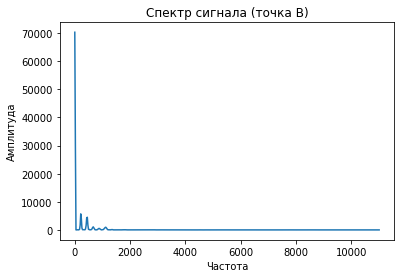

In [58]:
fff1 = np.arange(0, fs1, fs1/len(t1))
spec_dw1 = abs(np.fft.fft(dw1))

l1 = int(len(fff1)/2)

plt.plot(fff1[:l1], spec_dw1[:l1])
plt.title('Спектр сигнала (точка B)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

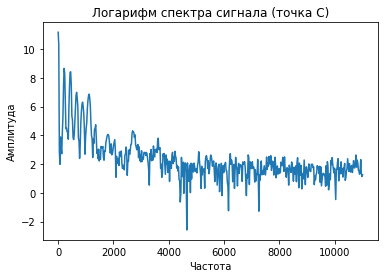

In [59]:
log_spec_dw1 = np.log(spec_dw1)

plt.plot(fff1[:l1], log_spec_dw1[:l1])
plt.title('Логарифм спектра сигнала (точка C)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

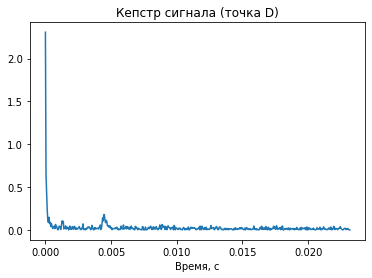

In [60]:
kepstr1 = abs(np.fft.ifft(log_spec_dw1))

plt.plot(t1[:l1], kepstr1[:l1])
plt.title('Кепстр сигнала (точка D)')
plt.xlabel('Время, с')
plt.show()

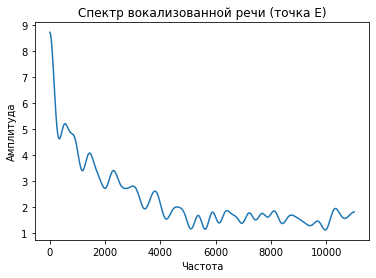

In [61]:
kw1 = kepstr1
kw1[int(len(kw1)/20):int(19 * len(kw1)/20)] = 0

spec_kw1 = abs(np.fft.fft(kw1))

plt.plot(fff1[:l1], spec_kw1[:l1])
plt.title('Спектр вокализованной речи (точка E)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

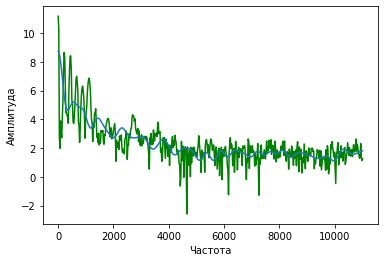

In [62]:
plt.plot(fff1[:l1], log_spec_dw1[:l1], color='g')
plt.plot(fff1[:int(len(fff1)/2)], spec_kw1[:int(len(fff1)/2)])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

Определить ЛПК-коэффициенты для выбранного участка речи.

In [67]:
import librosa
import scipy

In [68]:
fs1, x1 = wavfile.read('audio/TA0.wav')

x = np.array(x1[5700:6724], dtype=np.float64)

In [69]:
coef = librosa.lpc(x, 28)

w, h = scipy.signal.freqz(0.01, coef, fs=fs1)

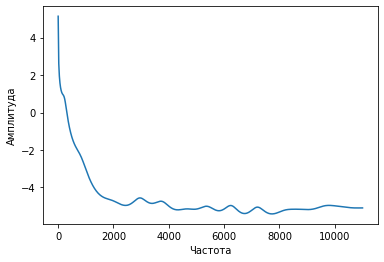

In [70]:
plt.plot(fff1[:512], np.log(abs(h)))
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

 Построить оценку спектра

In [71]:
t = np.arange(0, len(x)/fs1, 1/fs1)

In [72]:
pred_x = abs(scipy.signal.lfilter(h, 165, x))

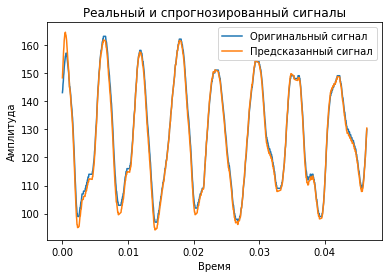

In [73]:
plt.plot(t, x, label='Оригинальный сигнал')
plt.plot(t, pred_x, label='Предсказанный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Реальный и спрогнозированный сигналы')
plt.legend()
plt.show()

Вычислить ошибку e[n]

In [74]:
e = abs(x - pred_x)

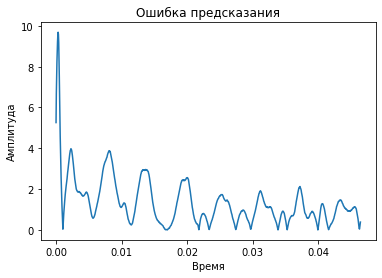

In [75]:
plt.plot(t, e)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Ошибка предсказания')
plt.show()

Определить частоту основного тона по графику e[n]

In [148]:
R = 5
N = len(e)
P1 = e 

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = e[index]
    P1 = P1[:len(dec)] * dec
    
fff = np.arange(0, fs1, fs1/len(P1))

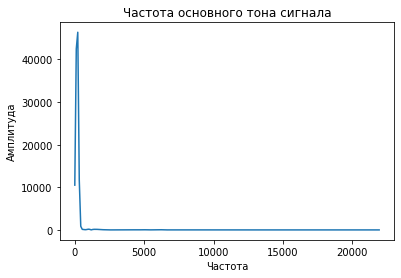

In [149]:
plt.plot(fff, P1)
plt.title('Частота основного тона сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

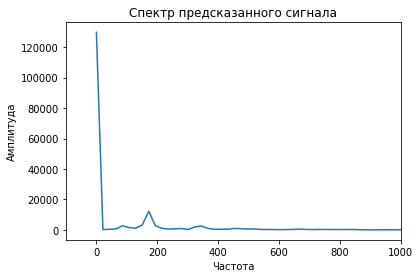

In [150]:
spec_pred_x = abs(np.fft.fft(pred_x))
l = int(len(fff1)/2)

plt.plot(fff1[:l], spec_pred_x[:l])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.title('Спектр предсказанного сигнала')
plt.xlim(-100, 1000)
plt.show()